# Part 5, Targeted Sentiments

In [2]:
# !pip install ktrain

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 25.3 MB 39 kB/s  eta 0:00:014.6 MB/s eta 0:00:05          | 11.5 MB 4.6 MB/s eta 0:00:04        | 18.4 MB 4.6 MB/s eta 0:00:02��███████████████▊| 25.1 MB 4.6 MB/s eta 0:00:01
     |████████████████████████████████| 981 kB 92.9 MB/s eta 0:00:01
     |████████████████████████████████| 19.2 MB 97.1 MB/s eta 0:00:01             | 5.3 MB 97.1 MB/s eta 0:00:01��████████████████████▋          | 12.9 MB 97.1 MB/s eta 0:00:01
     |████████████████████████████████| 265 kB 120.6 MB/s eta 0:00:01
     |████████████████████████████████| 178 kB 115.2 MB/s eta 0:00:01
     |████████████████████████████████| 2.8 MB 120.0 MB/s eta 0:00:01  |███████████▉                    | 1.0 MB 120.0 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 102.0 MB/s eta 0:00:01
     |████████████████████████████████| 468 kB 106.4 MB/s eta 0:00:01
  Created wheel for ktrain: filename=ktrain-0

In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import re
import string
import ktrain

In [2]:
pd.set_option('display.max_colwidth', 200)

In [3]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
zsl = ktrain.text.ZeroShotClassifier()

In [7]:
df_cleaned_news = pd.read_csv('df_cleaned_news.csv')
df_cleaned_news.head()

Unnamed: 0        date  \
0           0  2022-01-06   
1           1  2022-01-06   
2           2  2022-01-06   
3           3  2022-01-06   
4           4  2022-01-06   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            clean_text  \
0  chicago  ap   chicago school leaders canceled classes thursday   second consecutive day  failing  reach agreement   teachers union  covid   safety protocols   nation third largest school district  the chicago teachers union sought  revert  remote instruction   latest surge  infections    sides hammer   deal  but chicago public schools leaders  said remote learning  work  schools  safely remain open  protocols  place  the move  cancel classes  activities thursday affects roughly     students ...   
1                                                                                                                                                                                                                                                       chicago pd    lies season   episode   promo  voight employs  new informant  help solve  tricky drug trafficking case  atwater     struggles  reconcile  personal  professional life  reaches  decision   jesseleesoffer  marinasqu  trspiridakos  nbcchicagopd   
2  wise  foolish  the chicago tribune article titled  chicago public schools cancels classes  thursday  deadlock  union continues  trump  biden press secretary  comment  impasse  reported trumps solution  follows educate  children  person  give every dollar spent  education directly   students    get    failing government schools  trump said   statement  the purpose  this post is  relate  ancient wisdom proverb  trump solution  king solomon go   presence   foolish man   thou perceivest     lips...   
3  the neighbors near mashawn plummer portage park firehouse knew    often sat outside   friendly presence   station  he showed  early   shifts  ready    job   thrilled    friends  family recalled  chicago firefighter emt mashawn plummer  engine     chicago fire department  hundreds  chicago firefighters joined family  friends  thursday  lay plummer  rest   died  december battling  apartment fire   northwest side  they remembered plummer       gentle giant  followed  dream  becoming  chicago fi...   
4              mashawn plummer died final month  preventing  fireplace  town northwest aspect  additionally killed  civilian  a visitation  held  plummer wednesday night time  a remaining visitation  probably  held        home  hope church    e  114th st  related   chicago firefighter amongst   critically injured  belmont central residence fireplace    killed following  ultimate visitation  funeral companies  start         probably  adopted   procession  oak woods cemetery  67th road  the   yea...   

                                                                                                                    clean_title  
0                                                                           no deal   school  chicago cancels classes   2nd day  
1                                                                                          watch chicago p d  preview wednesday  
2                                                                     trump solution  chicago public schools  king solomon blog  
3  family  friends  colleagues gathering today  south side church  attend funeral services  chicago firefighter mashawn plummer  
4                                                     chicago firefighter funeral  pals  household say goodbye  mashawn plummer

In [8]:
df_cleaned_news.isna().sum()

Unnamed: 0     0
date           0
clean_text     7
clean_title    6
dtype: int64

In [9]:
df_cleaned_news.dropna(inplace=True)

In [10]:
df_cleaned_news.shape

(165360, 4)

In [11]:
df_cleaned_news.reset_index(inplace=True, drop=True)

In [12]:
df_cleaned_news.shape

(165360, 4)

In [13]:
texts = df_cleaned_news['clean_text'].tolist()

In [14]:
texts[0]

'chicago  ap   chicago school leaders canceled classes thursday   second consecutive day  failing  reach agreement   teachers union  covid   safety protocols   nation third largest school district  the chicago teachers union sought  revert  remote instruction   latest surge  infections    sides hammer   deal  but chicago public schools leaders  said remote learning  work  schools  safely remain open  protocols  place  the move  cancel classes  activities thursday affects roughly     students  came  closed door negotiations wednesday failed  produce  deal  the issues include metrics  closing schools  we   choice   cancel classes tomorrow  schools ceo pedro martinez said   wednesday evening news conference  students returned  class monday   two week winter break  covid   infections  hospitalizations fueled   omicron variant  record levels  school districts nationwide  grappled    issue     opting  stay open  ramping  virus testing  tweaking protocols   adjustments  response   shifting pa

### Using ZSL to predict topics

In [15]:
labels=['business', 'crime', 'education', 'sports', 'food', 'divorce', 'drugs', 'attorney']
zsl.predict(texts[0], labels=labels, include_labels=False, multilabel=False)

[0.17214244604110718,
 0.045058347284793854,
 0.43368256092071533,
 0.024160325527191162,
 0.02816104330122471,
 0.021032970398664474,
 0.022232770919799805,
 0.2535295784473419]

In [16]:
predictions = [zsl.predict(text, labels=labels, include_labels=False, multilabel=False) for text in texts]

In [17]:
predictions_df = pd.DataFrame(predictions, columns=[labels]) 

In [18]:
predictions_df.head()

business     crime education    sports      food   divorce     drugs  \
0  0.172142  0.045058  0.433683  0.024160  0.028161  0.021033  0.022233   
1  0.066623  0.403205  0.005265  0.005750  0.002362  0.006234  0.486218   
2  0.011743  0.013673  0.923569  0.004741  0.006351  0.006456  0.005824   
3  0.118627  0.206906  0.127061  0.090711  0.094926  0.100803  0.111046   
4  0.078994  0.121979  0.243502  0.038021  0.059092  0.038105  0.038271   

   attorney  
0  0.253530  
1  0.024342  
2  0.027643  
3  0.149919  
4  0.382035

In [19]:
news_topics = df_cleaned_news.join(predictions_df, how='inner')

In [20]:
news_topics.head()

Unnamed: 0        date  \
0           0  2022-01-06   
1           1  2022-01-06   
2           2  2022-01-06   
3           3  2022-01-06   
4           4  2022-01-06   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            clean_text  \
0  chicago  ap   chicago school leaders canceled classes thursday   second consecutive day  failing  reach agreement   teachers union  covid   safety protocols   nation third largest school district  the chicago teachers union sought  revert  remote instruction   latest surge  infections    sides hammer   deal  but chicago public schools leaders  said remote learning  work  schools  safely remain open  protocols  place  the move  cancel classes  activities thursday affects roughly     students ...   
1                                                                                                                                                                                                                                                       chicago pd    lies season   episode   promo  voight employs  new informant  help solve  tricky drug trafficking case  atwater     struggles  reconcile  personal  professional life  reaches  decision   jesseleesoffer  marinasqu  trspiridakos  nbcchicagopd   
2  wise  foolish  the chicago tribune article titled  chicago public schools cancels classes  thursday  deadlock  union continues  trump  biden press secretary  comment  impasse  reported trumps solution  follows educate  children  person  give every dollar spent  education directly   students    get    failing government schools  trump said   statement  the purpose  this post is  relate  ancient wisdom proverb  trump solution  king solomon go   presence   foolish man   thou perceivest     lips...   
3  the neighbors near mashawn plummer portage park firehouse knew    often sat outside   friendly presence   station  he showed  early   shifts  ready    job   thrilled    friends  family recalled  chicago firefighter emt mashawn plummer  engine     chicago fire department  hundreds  chicago firefighters joined family  friends  thursday  lay plummer  rest   died  december battling  apartment fire   northwest side  they remembered plummer       gentle giant  followed  dream  becoming  chicago fi...   
4              mashawn plummer died final month  preventing  fireplace  town northwest aspect  additionally killed  civilian  a visitation  held  plummer wednesday night time  a remaining visitation  probably  held        home  hope church    e  114th st  related   chicago firefighter amongst   critically injured  belmont central residence fireplace    killed following  ultimate visitation  funeral companies  start         probably  adopted   procession  oak woods cemetery  67th road  the   yea...   

                                                                                                                    clean_title  \
0                                                                           no deal   school  chicago cancels classes   2nd day   
1                                                                                          watch chicago p d  preview wednesday   
2                                                                     trump solution  chicago public schools  king solomon blog   
3  family  friends  colleagues gathering today  south side church  attend funeral services  chicago firefighter mashawn plummer   
4                                                     chicago firefighter funeral  pals  household say goodbye  mashawn plummer   

   (

In [22]:
news_topics = news_topics.rename(columns={news_topics.columns[4]: "business", \
                                          news_topics.columns[5]: "crime", \
                                          news_topics.columns[6]: "education", \
                                          news_topics.columns[7]: "sports", \
                                          news_topics.columns[8]: "food", \
                                          news_topics.columns[9]: "divorce", \
                                          news_topics.columns[10]: "drugs", \
                                          news_topics.columns[11]: "attorney"})
# news_sentiments.columns[4]

In [23]:
news_topics.head()

Unnamed: 0        date  \
0           0  2022-01-06   
1           1  2022-01-06   
2           2  2022-01-06   
3           3  2022-01-06   
4           4  2022-01-06   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            clean_text  \
0  chicago  ap   chicago school leaders canceled classes thursday   second consecutive day  failing  reach agreement   teachers union  covid   safety protocols   nation third largest school district  the chicago teachers union sought  revert  remote instruction   latest surge  infections    sides hammer   deal  but chicago public schools leaders  said remote learning  work  schools  safely remain open  protocols  place  the move  cancel classes  activities thursday affects roughly     students ...   
1                                                                                                                                                                                                                                                       chicago pd    lies season   episode   promo  voight employs  new informant  help solve  tricky drug trafficking case  atwater     struggles  reconcile  personal  professional life  reaches  decision   jesseleesoffer  marinasqu  trspiridakos  nbcchicagopd   
2  wise  foolish  the chicago tribune article titled  chicago public schools cancels classes  thursday  deadlock  union continues  trump  biden press secretary  comment  impasse  reported trumps solution  follows educate  children  person  give every dollar spent  education directly   students    get    failing government schools  trump said   statement  the purpose  this post is  relate  ancient wisdom proverb  trump solution  king solomon go   presence   foolish man   thou perceivest     lips...   
3  the neighbors near mashawn plummer portage park firehouse knew    often sat outside   friendly presence   station  he showed  early   shifts  ready    job   thrilled    friends  family recalled  chicago firefighter emt mashawn plummer  engine     chicago fire department  hundreds  chicago firefighters joined family  friends  thursday  lay plummer  rest   died  december battling  apartment fire   northwest side  they remembered plummer       gentle giant  followed  dream  becoming  chicago fi...   
4              mashawn plummer died final month  preventing  fireplace  town northwest aspect  additionally killed  civilian  a visitation  held  plummer wednesday night time  a remaining visitation  probably  held        home  hope church    e  114th st  related   chicago firefighter amongst   critically injured  belmont central residence fireplace    killed following  ultimate visitation  funeral companies  start         probably  adopted   procession  oak woods cemetery  67th road  the   yea...   

                                                                                                                    clean_title  \
0                                                                           no deal   school  chicago cancels classes   2nd day   
1                                                                                          watch chicago p d  preview wednesday   
2                                                                     trump solution  chicago public schools  king solomon blog   
3  family  friends  colleagues gathering today  south side church  attend funeral services  chicago firefighter mashawn plummer   
4                                                     chicago firefighter funeral  pals  household say goodbye  mashawn plummer   

   b

In [24]:
# Saving the predicted topics using ZSL to a csv

news_topics.to_csv("zero_shot_topics.csv")

In [25]:
news_topics.shape

(165360, 12)

### Merging all datasets to create a final dataset

In [4]:
zero_shot_topics = pd.read_csv("zero_shot_topics.csv")

In [5]:
zero_shot_topics['Relevant_Topic'] = zero_shot_topics[['business','crime','education','sports','food','divorce',\
                                                       'drugs','attorney']].idxmax(axis=1)

In [6]:
zero_shot_topics.head()

Unnamed: 0  Unnamed: 0.1        date  \
0           0             0  2022-01-06   
1           1             1  2022-01-06   
2           2             2  2022-01-06   
3           3             3  2022-01-06   
4           4             4  2022-01-06   

                                                                                                                                                                                                clean_text  \
0  chicago  ap   chicago school leaders canceled classes thursday   second consecutive day  failing  reach agreement   teachers union  covid   safety protocols   nation third largest school district ...   
1  chicago pd    lies season   episode   promo  voight employs  new informant  help solve  tricky drug trafficking case  atwater     struggles  reconcile  personal  professional life  reaches  decisi...   
2  wise  foolish  the chicago tribune article titled  chicago public schools cancels classes  thursday  deadlock  union continues  trump  biden press secretary  comment  impasse  reported trumps solu...   
3  the neighbors near mashawn plummer portage park firehouse knew    often sat outside   friendly presence   station  he showed  early   shifts  ready    job   thrilled    friends  family recalled  c...   
4              mashawn plummer died final month  preventing  fireplace  town northwest aspect  additionally killed  civilian  a visitation  held  plummer wednesday night time  a remaining visitation ...   

                                                                                                                    clean_title  \
0                                                                           no deal   school  chicago cancels classes   2nd day   
1                                                                                          watch chicago p d  preview wednesday   
2                                                                     trump solution  chicago public schools  king solomon blog   
3  family  friends  colleagues gathering today  south side church  attend funeral services  chicago firefighter mashawn plummer   
4                                                     chicago firefighter funeral  pals  household say goodbye  mashawn plummer   

   business     crime  education    sports      food   divorce     drugs  \
0  0.172142  0.045058   0.433683  0.024160  0.028161  0.021033  0.022233   
1  0.066623  0.403205   0.005265  0.005750  0.002362  0.006234  0.486218   
2  0.011743  0.013673   0.923569  0.004741  0.006351  0.006456  0.005824   
3  0.118627  0.206906   0.127061  0.090711  0.094926  0.100803  0.111046   
4  0.078994  0.121979   0.243502  0.038021  0.059092  0.038105  0.038271   

   attorney Relevant_Topic  
0  0.253530      education  
1  0.024342          drugs  
2  0.027643      education  
3  0.149919          crime  
4  0.382035       attorney

In [7]:
zero_shot_topics.drop(columns=[zero_shot_topics.columns[0], zero_shot_topics.columns[1]], inplace=True)

In [8]:
zero_shot_topics.head()

date  \
0  2022-01-06   
1  2022-01-06   
2  2022-01-06   
3  2022-01-06   
4  2022-01-06   

                                                                                                                                                                                                clean_text  \
0  chicago  ap   chicago school leaders canceled classes thursday   second consecutive day  failing  reach agreement   teachers union  covid   safety protocols   nation third largest school district ...   
1  chicago pd    lies season   episode   promo  voight employs  new informant  help solve  tricky drug trafficking case  atwater     struggles  reconcile  personal  professional life  reaches  decisi...   
2  wise  foolish  the chicago tribune article titled  chicago public schools cancels classes  thursday  deadlock  union continues  trump  biden press secretary  comment  impasse  reported trumps solu...   
3  the neighbors near mashawn plummer portage park firehouse knew    often sat outside   friendly presence   station  he showed  early   shifts  ready    job   thrilled    friends  family recalled  c...   
4              mashawn plummer died final month  preventing  fireplace  town northwest aspect  additionally killed  civilian  a visitation  held  plummer wednesday night time  a remaining visitation ...   

                                                                                                                    clean_title  \
0                                                                           no deal   school  chicago cancels classes   2nd day   
1                                                                                          watch chicago p d  preview wednesday   
2                                                                     trump solution  chicago public schools  king solomon blog   
3  family  friends  colleagues gathering today  south side church  attend funeral services  chicago firefighter mashawn plummer   
4                                                     chicago firefighter funeral  pals  household say goodbye  mashawn plummer   

   business     crime  education    sports      food   divorce     drugs  \
0  0.172142  0.045058   0.433683  0.024160  0.028161  0.021033  0.022233   
1  0.066623  0.403205   0.005265  0.005750  0.002362  0.006234  0.486218   
2  0.011743  0.013673   0.923569  0.004741  0.006351  0.006456  0.005824   
3  0.118627  0.206906   0.127061  0.090711  0.094926  0.100803  0.111046   
4  0.078994  0.121979   0.243502  0.038021  0.059092  0.038105  0.038271   

   attorney Relevant_Topic  
0  0.253530      education  
1  0.024342          drugs  
2  0.027643      education  
3  0.149919          crime  
4  0.382035       attorney

In [9]:
df_sentiments = pd.read_csv("zero_shot_bert_sentiment.csv")
df_ner = pd.read_csv("df_cleaned_news_ner.csv")

In [10]:
df_sentiments['Sentiment_Pred_New'] = df_sentiments['Sentiment_Pred'].apply(lambda x: "Positive" if x==1 else "Negative")
df_sentiments = df_sentiments[['date','clean_text','clean_title','Sentiment_Pred_New']]
df_sentiments.head()

date  \
0  2022-03-15   
1  2022-03-21   
2  2022-04-15   
3  2022-02-06   
4  2022-01-30   

                                                                                                                                                                                                clean_text  \
0  chicago  new york flights  chicago  new york flights  ticket   lowest cost  find  lowest prices   coming chicago  new york flights   bookflight  also  book new york  chicago flights  there  curren...   
1     w wrightwood ave apt          the gaertner building  racine  wrightwood  lincoln park    scientific  astronomical instrument factory   it  best known  pioneering  ellipsometer  originally built...   
2    north michigan avenue  chicago  illinois                   email chicago subzero repair companies chicago subzero repair email  established january   for     years  chicago sub zero repair   pro...   
3  on saturday  indiana played  strong first half  faded   second   minutes  league leader illinois       loss  after  game  assembly call  live  switchyard brewery  bloomington   annual meetup  the ...   
4  erika jayne    hook   least  illinois   the real housewives of beverly hills star   dismissed   estranged husband tom girardi    embezzlement  fraud lawsuit   according  court documents filed   st...   

                                                                              clean_title  \
0                                                               chicago  new york flights   
1                                           five lofts for sale  former chicago factories   
2                               chicago subzero repair   chicago  illinois  united states   
3                iu illinois postgame show  switchyard  hoosiers fade late against illini   
4  erika jayne dismissed from fraud  embezzlement lawsuit against tom girardi in illinois   

  Sentiment_Pred_New  
0           Positive  
1           Positive  
2           Negative  
3           Negative  
4           Positive

In [11]:
df_sentiments.shape

(165360, 4)

In [12]:
zero_shot_topics.shape

(165360, 12)

In [13]:
# Merging zero shot sentiments and topics dataframes

df_sentiments_topics = zero_shot_topics.merge(df_sentiments[['Sentiment_Pred_New','clean_text']], how='inner', on="clean_text")

In [14]:
df_sentiments_topics.head()

date  \
0  2022-01-06   
1  2022-01-06   
2  2022-01-06   
3  2022-01-06   
4  2022-01-06   

                                                                                                                                                                                                clean_text  \
0  chicago  ap   chicago school leaders canceled classes thursday   second consecutive day  failing  reach agreement   teachers union  covid   safety protocols   nation third largest school district ...   
1  chicago pd    lies season   episode   promo  voight employs  new informant  help solve  tricky drug trafficking case  atwater     struggles  reconcile  personal  professional life  reaches  decisi...   
2  wise  foolish  the chicago tribune article titled  chicago public schools cancels classes  thursday  deadlock  union continues  trump  biden press secretary  comment  impasse  reported trumps solu...   
3  the neighbors near mashawn plummer portage park firehouse knew    often sat outside   friendly presence   station  he showed  early   shifts  ready    job   thrilled    friends  family recalled  c...   
4              mashawn plummer died final month  preventing  fireplace  town northwest aspect  additionally killed  civilian  a visitation  held  plummer wednesday night time  a remaining visitation ...   

                                                                                                                    clean_title  \
0                                                                           no deal   school  chicago cancels classes   2nd day   
1                                                                                          watch chicago p d  preview wednesday   
2                                                                     trump solution  chicago public schools  king solomon blog   
3  family  friends  colleagues gathering today  south side church  attend funeral services  chicago firefighter mashawn plummer   
4                                                     chicago firefighter funeral  pals  household say goodbye  mashawn plummer   

   business     crime  education    sports      food   divorce     drugs  \
0  0.172142  0.045058   0.433683  0.024160  0.028161  0.021033  0.022233   
1  0.066623  0.403205   0.005265  0.005750  0.002362  0.006234  0.486218   
2  0.011743  0.013673   0.923569  0.004741  0.006351  0.006456  0.005824   
3  0.118627  0.206906   0.127061  0.090711  0.094926  0.100803  0.111046   
4  0.078994  0.121979   0.243502  0.038021  0.059092  0.038105  0.038271   

   attorney Relevant_Topic Sentiment_Pred_New  
0  0.253530      education           Negative  
1  0.024342          drugs           Negative  
2  0.027643      education           Negative  
3  0.149919          crime           Negative  
4  0.382035       attorney           Positive

In [15]:
# Keeping only relevant columns from the NER df

df_ner = df_ner[['date','clean_text','clean_title','entities_labels','ORG_count', 'PERSON_count']]

In [16]:
df_ner.head()

date  \
0  2022-01-06   
1  2022-01-06   
2  2022-01-06   
3  2022-01-06   
4  2022-01-06   

                                                                                                                                                                                                clean_text  \
0  chicago  ap   chicago school leaders canceled classes thursday   second consecutive day  failing  reach agreement   teachers union  covid   safety protocols   nation third largest school district ...   
1  chicago pd    lies season   episode   promo  voight employs  new informant  help solve  tricky drug trafficking case  atwater     struggles  reconcile  personal  professional life  reaches  decisi...   
2  wise  foolish  the chicago tribune article titled  chicago public schools cancels classes  thursday  deadlock  union continues  trump  biden press secretary  comment  impasse  reported trumps solu...   
3  the neighbors near mashawn plummer portage park firehouse knew    often sat outside   friendly presence   station  he showed  early   shifts  ready    job   thrilled    friends  family recalled  c...   
4              mashawn plummer died final month  preventing  fireplace  town northwest aspect  additionally killed  civilian  a visitation  held  plummer wednesday night time  a remaining visitation ...   

                                                                                                                    clean_title  \
0                                                                           no deal   school  chicago cancels classes   2nd day   
1                                                                                          watch chicago p d  preview wednesday   
2                                                                     trump solution  chicago public schools  king solomon blog   
3  family  friends  colleagues gathering today  south side church  attend funeral services  chicago firefighter mashawn plummer   
4                                                     chicago firefighter funeral  pals  household say goodbye  mashawn plummer   

                                                                                                                                                                                           entities_labels  \
0  {'ap': 'ORG', 'the chicago teachers union': 'ORG', 'pedro martinez': 'PERSON', 'white house': 'ORG', 'jen psaki': 'PERSON', 'joe biden': 'PERSON', 'donald trump': 'PERSON', 'jesse sharkey': 'PERSO...   
1                                                                                                                                   {'chicago pd    ': 'ORG', 'voight': 'ORG', 'jesseleesoffer': 'PERSON'}   
2                                                                              {'the chicago tribune article': 'ORG', 'biden press': 'ORG', 'solomon': 'PERSON', 'lightfoot': 'PERSON', 'obama': 'PERSON'}   
3                                                                                                          {'plummer portage': 'PERSON', 'emt': 'PERSON', 'plummer': 'PERSON', 'plummer       ': 'PERSON'}   
4  {'plummer': 'PERSON', 'englewood': 'PERSON', 'plummer  ': 'PERSON', 'dolores johnson': 'PERSON', 'fireman  johnson': 'PERSON', 'arnetta carr': 'PERSON', 'pat        ': 'PERSON', 'gomez': 'ORG', 'j...   

   ORG_count  PERSON_count  
0          9            13  
1          2             1  
2          2             3  
3          0             5  
4          1            15

In [17]:
df_ner.shape

(165360, 6)

In [18]:
# Joining the NER df with the merged df to create the final dataset

df_news_final = df_sentiments_topics.join(df_ner[['entities_labels','ORG_count', 'PERSON_count']], how='inner')

In [19]:
df_news_final.head()

date  \
0  2022-01-06   
1  2022-01-06   
2  2022-01-06   
3  2022-01-06   
4  2022-01-06   

                                                                                                                                                                                                clean_text  \
0  chicago  ap   chicago school leaders canceled classes thursday   second consecutive day  failing  reach agreement   teachers union  covid   safety protocols   nation third largest school district ...   
1  chicago pd    lies season   episode   promo  voight employs  new informant  help solve  tricky drug trafficking case  atwater     struggles  reconcile  personal  professional life  reaches  decisi...   
2  wise  foolish  the chicago tribune article titled  chicago public schools cancels classes  thursday  deadlock  union continues  trump  biden press secretary  comment  impasse  reported trumps solu...   
3  the neighbors near mashawn plummer portage park firehouse knew    often sat outside   friendly presence   station  he showed  early   shifts  ready    job   thrilled    friends  family recalled  c...   
4              mashawn plummer died final month  preventing  fireplace  town northwest aspect  additionally killed  civilian  a visitation  held  plummer wednesday night time  a remaining visitation ...   

                                                                                                                    clean_title  \
0                                                                           no deal   school  chicago cancels classes   2nd day   
1                                                                                          watch chicago p d  preview wednesday   
2                                                                     trump solution  chicago public schools  king solomon blog   
3  family  friends  colleagues gathering today  south side church  attend funeral services  chicago firefighter mashawn plummer   
4                                                     chicago firefighter funeral  pals  household say goodbye  mashawn plummer   

   business     crime  education    sports      food   divorce     drugs  \
0  0.172142  0.045058   0.433683  0.024160  0.028161  0.021033  0.022233   
1  0.066623  0.403205   0.005265  0.005750  0.002362  0.006234  0.486218   
2  0.011743  0.013673   0.923569  0.004741  0.006351  0.006456  0.005824   
3  0.118627  0.206906   0.127061  0.090711  0.094926  0.100803  0.111046   
4  0.078994  0.121979   0.243502  0.038021  0.059092  0.038105  0.038271   

   attorney Relevant_Topic Sentiment_Pred_New  \
0  0.253530      education           Negative   
1  0.024342          drugs           Negative   
2  0.027643      education           Negative   
3  0.149919          crime           Negative   
4  0.382035       attorney           Positive   

                                                                                                                                                                                           entities_labels  \
0  {'ap': 'ORG', 'the chicago teachers union': 'ORG', 'pedro martinez': 'PERSON', 'white house': 'ORG', 'jen psaki': 'PERSON', 'joe biden': 'PERSON', 'donald trump': 'PERSON', 'jesse sharkey': 'PERSO...   
1                                                                                                                                   {'chicago pd    ': 'ORG', 'voight': 'ORG', 'jesseleesoffer': 'PERSON'}   
2                                                                              {'the chicago tribune article': 'ORG', 'biden press': 'ORG', 'solomon': 'PERSON', 'lightfoot': 'PERSON', 'obama': 'PERSON'}   
3                                                                                                          {'plummer portage': 'PERSON', 'emt': 'PERSON', 'plummer': 'PERSON', 'plummer       ': 'PERSON'}   
4  {'plummer': 'PERSON', 'englewood': 'PERSON', 'plummer  ': 'PERSON', 'dolores johnson': 'PERSON', 

In [20]:
# Keeping only relevant columns

df_news_final = df_news_final[['date','clean_text','clean_title','Relevant_Topic','Sentiment_Pred_New',\
                               'entities_labels','ORG_count','PERSON_count']]

In [21]:
df_news_final.head()

date  \
0  2022-01-06   
1  2022-01-06   
2  2022-01-06   
3  2022-01-06   
4  2022-01-06   

                                                                                                                                                                                                clean_text  \
0  chicago  ap   chicago school leaders canceled classes thursday   second consecutive day  failing  reach agreement   teachers union  covid   safety protocols   nation third largest school district ...   
1  chicago pd    lies season   episode   promo  voight employs  new informant  help solve  tricky drug trafficking case  atwater     struggles  reconcile  personal  professional life  reaches  decisi...   
2  wise  foolish  the chicago tribune article titled  chicago public schools cancels classes  thursday  deadlock  union continues  trump  biden press secretary  comment  impasse  reported trumps solu...   
3  the neighbors near mashawn plummer portage park firehouse knew    often sat outside   friendly presence   station  he showed  early   shifts  ready    job   thrilled    friends  family recalled  c...   
4              mashawn plummer died final month  preventing  fireplace  town northwest aspect  additionally killed  civilian  a visitation  held  plummer wednesday night time  a remaining visitation ...   

                                                                                                                    clean_title  \
0                                                                           no deal   school  chicago cancels classes   2nd day   
1                                                                                          watch chicago p d  preview wednesday   
2                                                                     trump solution  chicago public schools  king solomon blog   
3  family  friends  colleagues gathering today  south side church  attend funeral services  chicago firefighter mashawn plummer   
4                                                     chicago firefighter funeral  pals  household say goodbye  mashawn plummer   

  Relevant_Topic Sentiment_Pred_New  \
0      education           Negative   
1          drugs           Negative   
2      education           Negative   
3          crime           Negative   
4       attorney           Positive   

                                                                                                                                                                                           entities_labels  \
0  {'ap': 'ORG', 'the chicago teachers union': 'ORG', 'pedro martinez': 'PERSON', 'white house': 'ORG', 'jen psaki': 'PERSON', 'joe biden': 'PERSON', 'donald trump': 'PERSON', 'jesse sharkey': 'PERSO...   
1                                                                                                                                   {'chicago pd    ': 'ORG', 'voight': 'ORG', 'jesseleesoffer': 'PERSON'}   
2                                                                              {'the chicago tribune article': 'ORG', 'biden press': 'ORG', 'solomon': 'PERSON', 'lightfoot': 'PERSON', 'obama': 'PERSON'}   
3                                                                                                          {'plummer portage': 'PERSON', 'emt': 'PERSON', 'plummer': 'PERSON', 'plummer       ': 'PERSON'}   
4  {'plummer': 'PERSON', 'englewood': 'PERSON', 'plummer  ': 'PERSON', 'dolores johnson': 'PERSON', 'fireman  johnson': 'PERSON', 'arnetta carr': 'PERSON', 'pat        ': 'PERSON', 'gomez': 'ORG', 'j...   

   ORG_count  PERSON_count  
0          9            13  
1          2             1  
2          2             3  
3          0             5  
4          1            15

In [22]:
df_news_final.to_csv("df_news_final.csv")

### Analyzing Zero Shot Topics for positive and negative sentiments

In [22]:
df_news_final = pd.read_csv("df_news_final.csv")

In [23]:
# Creating df with positive sentiments

df_news_final_positive = df_news_final[df_news_final["Sentiment_Pred_New"] == "Positive"]
df_news_final_positive.Relevant_Topic.value_counts()

business     20658
sports       13014
attorney     11477
education     5777
crime         5280
food          2886
drugs         2090
divorce       1293
Name: Relevant_Topic, dtype: int64

In [24]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [39]:
# Creating subset dataframes based on relevant topics in the positive sentiments df 

df_business = df_news_final_positive[df_news_final_positive["Relevant_Topic"] == "business"]
df_sports = df_news_final_positive[df_news_final_positive["Relevant_Topic"] == "sports"]
df_attorney = df_news_final_positive[df_news_final_positive["Relevant_Topic"] == "attorney"]

def generate_wordcloud(df, topic, sentiment):
    comment_words = ''
#     stopwords = set(STOPWORDS)
    for val in df.clean_text:

        # typecaste each val to string
        val = str(val)

        # split the value
        tokens = val.split()

        comment_words += " ".join(tokens)+" "

    wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='white',
                    stopwords={"illinois", "chicago"},
                    min_font_size = 10).generate(comment_words)

    # plot the WordCloud image                      
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
#     plt.title("Wordcloud for %s %s" %sentiment %topic)
    plt.tight_layout(pad = 0)

    plt.show()

Wordcloud for Positive Business Topic



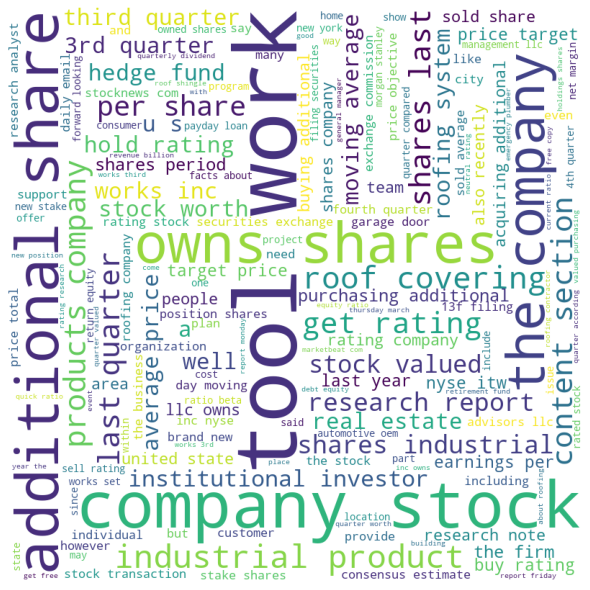

In [40]:
# Plotting wordclouds

print("Wordcloud for Positive Business Topic\n")
generate_wordcloud(df_business, 'business', "Positive")

Wordcloud for Positive Sports Topic



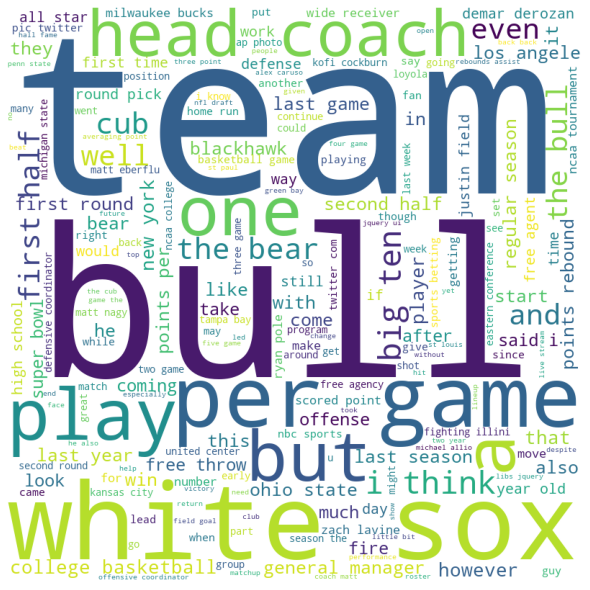

In [41]:
print("Wordcloud for Positive Sports Topic\n")
generate_wordcloud(df_sports, 'sports', "Positive")

Wordcloud for Positive Attorney Topic



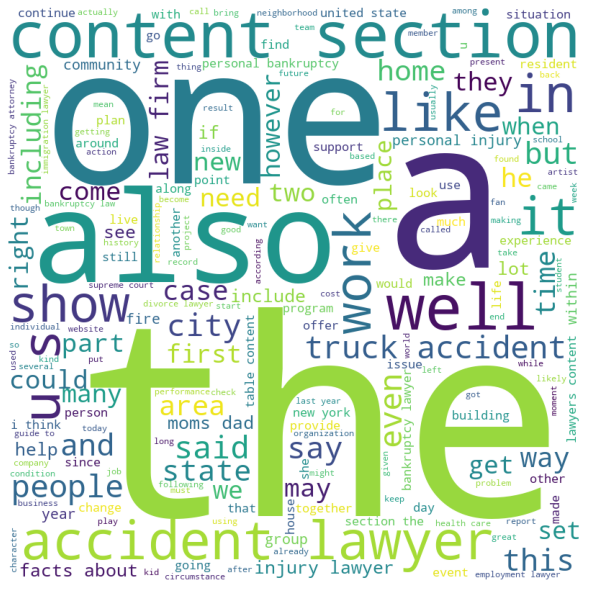

In [42]:
print("Wordcloud for Positive Attorney Topic\n")
generate_wordcloud(df_attorney, 'attorney', "Positive")

In [29]:
# Creating df with negative sentiments

df_news_final_negative = df_news_final[df_news_final["Sentiment_Pred_New"] == "Negative"]
df_news_final_negative.Relevant_Topic.value_counts()

crime        33663
business     26064
sports       15812
attorney     12737
education     8342
food          4130
drugs         1573
divorce        564
Name: Relevant_Topic, dtype: int64

In [43]:
# Creating subset dataframes based on relevant topics in the negative sentiments df

df_crime = df_news_final_negative[df_news_final_negative["Relevant_Topic"] == "crime"]
df_business = df_news_final_negative[df_news_final_negative["Relevant_Topic"] == "business"]
df_sports = df_news_final_negative[df_news_final_negative["Relevant_Topic"] == "sports"]

Wordcloud for Negative Crime Topic



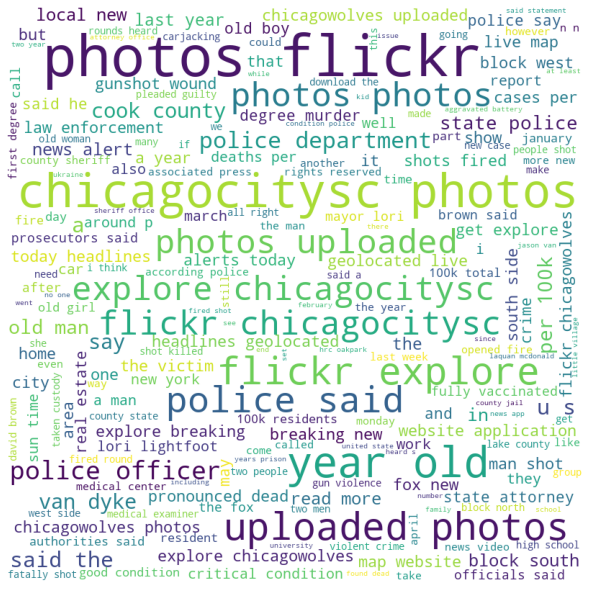

In [44]:
print("Wordcloud for Negative Crime Topic\n")
generate_wordcloud(df_crime, 'crime', "Negative")

Wordcloud for Negative Business Topic



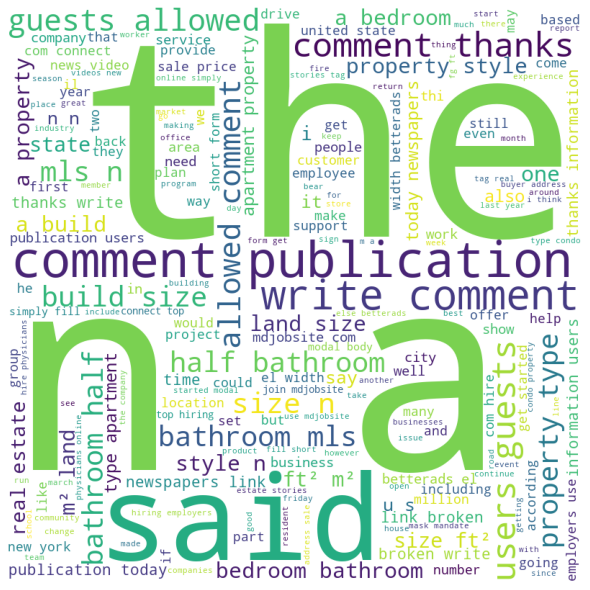

In [45]:
print("Wordcloud for Negative Business Topic\n")
generate_wordcloud(df_business, 'business', "Negative")

Wordcloud for Negative Sports Topic



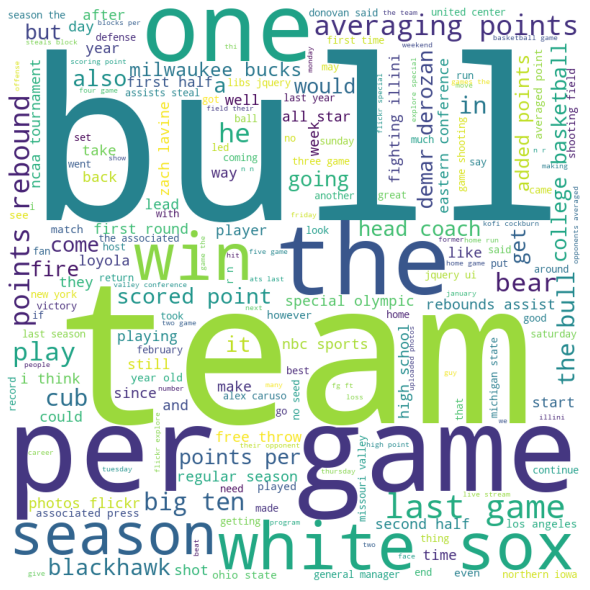

In [46]:
print("Wordcloud for Negative Sports Topic\n")
generate_wordcloud(df_sports, 'sports', "Negative")

### Targeted Sentiments

In [47]:
# Creating df for business articles by classifying articles have more ORG counts than PERSON counts as business related

business_articles = df_news_final[df_news_final["ORG_count"] > df_news_final["PERSON_count"]]

In [48]:
business_articles.head()

Unnamed: 0        date  \
1            1  2022-01-06   
10          10  2022-02-10   
11          11  2022-02-10   
14          14  2022-02-10   
24          24  2022-02-11   

                                                                                                                                                                                                 clean_text  \
1   chicago pd    lies season   episode   promo  voight employs  new informant  help solve  tricky drug trafficking case  atwater     struggles  reconcile  personal  professional life  reaches  decisi...   
10  save chicago ogden intl edged chicago little village lawndale   close     encounter   illinois boys basketball victory  february    in recent action  february    chicago ogden intl faced   chicago...   
11  peoria  ill    malevy leons    points  lead five bradley players  double figures   braves defeated loyola chicago      wednesday night  mikey howell  zek montgomery added   points apiece   braves ...   
14  getting the chicago family lawyer to work a biased view  family lawyers near me table  contents  some ideas  family law attorneys near me you need to know content section     the greatest guide to...   
24  someone fraudulently tried  apply  illinois unemployment benefits  winnetka police pioneer press   feb           pm thank   supporting  journalism  this article  available exclusively   subscriber...   

                                                                           clean_title  \
1                                                 watch chicago p d  preview wednesday   
10     tough tussle  chicago ogden intl steps past chicago little village lawndale       
11                                       leons carries bradley past loyola chicago       
14                                           getting the chicago family lawyer to work   
24  someone fraudulently tried  apply  illinois unemployment benefits  winnetka police   

   Relevant_Topic Sentiment_Pred_New  \
1           drugs           Negative   
10         sports           Positive   
11         sports           Negative   
14       attorney           Positive   
24          crime           Negative   

                                                                                                                                                                                            entities_labels  \
1                                                                                                                                    {'chicago pd    ': 'ORG', 'voight': 'ORG', 'jesseleesoffer': 'PERSON'}   
10                                                                                                                    {'chicago ogden intl': 'ORG', 'illinois boys': 'ORG', 'chicago bulls college': 'ORG'}   
11  {'malevy leons    ': 'PERSON', 'bradley': 'ORG', 'braves': 'ORG', 'loyola chicago': 'ORG', 'mikey howell': 'PERSON', 'mvc': 'ORG', 'tahvanainen': 'PERSON', 'terry roberts': 'PERSON', 'braden norri...   
14                                                                                                                                                                          {'gos': 'PERSON', 'adr': 'ORG'}   
24                                                                                                    {'jan     ': 'ORG', 'jan        ': 'PERSON', 'jan     personal': 'ORG', 'illinois department': 'ORG'}   

    ORG_count  PERSON_count  
1           2             1  
10          4             0  
11          9             7  
14          2             1  
24          4             1

In [49]:
# Creating df for person articles by classifying articles have more PERSON counts than ORG counts as person related

person_articles = df_news_final[df_news_final["ORG_count"] < df_news_final["PERSON_count"]]

In [50]:
person_articles.shape, business_articles.shape

((76503, 9), (54102, 9))

In [53]:
person_articles.head()

Unnamed: 0        date  \
0           0  2022-01-06   
2           2  2022-01-06   
3           3  2022-01-06   
4           4  2022-01-06   
6           6  2022-01-06   

                                                                                                                                                                                                clean_text  \
0  chicago  ap   chicago school leaders canceled classes thursday   second consecutive day  failing  reach agreement   teachers union  covid   safety protocols   nation third largest school district ...   
2  wise  foolish  the chicago tribune article titled  chicago public schools cancels classes  thursday  deadlock  union continues  trump  biden press secretary  comment  impasse  reported trumps solu...   
3  the neighbors near mashawn plummer portage park firehouse knew    often sat outside   friendly presence   station  he showed  early   shifts  ready    job   thrilled    friends  family recalled  c...   
4              mashawn plummer died final month  preventing  fireplace  town northwest aspect  additionally killed  civilian  a visitation  held  plummer wednesday night time  a remaining visitation ...   
6    shares read full article local news view more local news january   maine legislature convenes  person augusta  the maine legislature convened wednesday   start   short session  decisions  made  ...   

                                                                                                                    clean_title  \
0                                                                           no deal   school  chicago cancels classes   2nd day   
2                                                                     trump solution  chicago public schools  king solomon blog   
3  family  friends  colleagues gathering today  south side church  attend funeral services  chicago firefighter mashawn plummer   
4                                                     chicago firefighter funeral  pals  household say goodbye  mashawn plummer   
6                                                    the five  chicago teachers unions  bidens unpopularity   wvii   fox bangor   

  Relevant_Topic Sentiment_Pred_New  \
0      education           Negative   
2      education           Negative   
3          crime           Negative   
4       attorney           Positive   
6          crime           Positive   

                                                                                                                                                                                           entities_labels  \
0  {'ap': 'ORG', 'the chicago teachers union': 'ORG', 'pedro martinez': 'PERSON', 'white house': 'ORG', 'jen psaki': 'PERSON', 'joe biden': 'PERSON', 'donald trump': 'PERSON', 'jesse sharkey': 'PERSO...   
2                                                                              {'the chicago tribune article': 'ORG', 'biden press': 'ORG', 'solomon': 'PERSON', 'lightfoot': 'PERSON', 'obama': 'PERSON'}   
3                                                                                                          {'plummer portage': 'PERSON', 'emt': 'PERSON', 'plummer': 'PERSON', 'plummer       ': 'PERSON'}   
4  {'plummer': 'PERSON', 'englewood': 'PERSON', 'plummer  ': 'PERSON', 'dolores johnson': 'PERSON', 'fireman  johnson': 'PERSON', 'arnetta carr': 'PERSON', 'pat        ': 'PERSON', 'gomez': 'ORG', 'j...   
6  {'omicron variant bangor': 'ORG', 'cdc': 'ORG', 'augusta': 'PERSON', 'houlton': 'ORG', 'houlton farms': 'ORG', 'holden': 'ORG', 'machias': 'PERSON', 'afghanistan hannity': 'PERSON', 'reince priebu...   

   ORG_count  PERSON_count  
0          9            13  
2          2             3  
3          0             5  
4          1            15  
6         32            77

In [55]:
# Creating subset dataframes to look only at positive sentiments within business and person related articles

business_positive = business_articles[business_articles["Sentiment_Pred_New"] == "Positive"]
person_positive = person_articles[person_articles["Sentiment_Pred_New"] == "Positive"]

### LDA within target groups (business positive and person positive)

In [56]:
import gensim
from gensim import corpora, models
from gensim.models.ldamulticore import LdaMulticore
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import time 

import pyLDAvis
from pyLDAvis import gensim_models as gensimvis
pyLDAvis.enable_notebook()

import warnings
warnings.filterwarnings("ignore")

In [57]:
start_time = time.time()

def tic():
    global start_time 
    start_time = time.time()

def tac():
    t_sec = round(time.time() - start_time)
    (t_min, t_sec) = divmod(t_sec,60)
    (t_hour,t_min) = divmod(t_min,60) 
    print(f'Execution time to calculate for topic {k}: {t_hour}hour:{t_min}min:{t_sec}sec'.format(t_hour,t_min,t_sec))

In [58]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations
        
        
business_list_positive = business_positive['clean_text'].tolist()        
business_tokens_positive = list(sent_to_words(business_list_positive))

In [59]:
%time

bigram_positive = gensim.models.Phrases(business_tokens_positive, min_count=1, threshold=1) 
trigram_positive = gensim.models.Phrases(bigram_positive[business_tokens_positive], threshold=1)

bigram_mod_positive = gensim.models.phrases.Phraser(bigram_positive)
trigram_mod_positive = gensim.models.phrases.Phraser(trigram_positive)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs


In [60]:
import nltk
from nltk.corpus import stopwords
import spacy
nltk.download('stopwords')
stop_words = stopwords.words('english')

# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts, bigram_mod):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts, bigram_mod, trigram_mod):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

[nltk_data] Downloading package stopwords to /home/vritti/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [61]:
%%time

# Remove Stop Words
data_tokens_nostops_positive = remove_stopwords(business_tokens_positive)

# Create n-grams
data_words_bigrams_positive = make_bigrams(data_tokens_nostops_positive, bigram_mod_positive)
data_words_trigrams_positive = make_trigrams(data_tokens_nostops_positive, bigram_mod_positive, trigram_mod_positive)

# Combine tokens and n-grams
data_tokens_combined_positive = data_words_trigrams_positive

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])

# Lemmatize text keeping only noun, adj, vb, adv
data_lemmatized_positive = lemmatization(data_tokens_combined_positive, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(*data_lemmatized_positive[:1])

['edge', 'chicago_little_village', 'lawndale', 'illinois_boys_basketball_victory', 'bull', 'chicago_little_village', 'lawndale', 'take', 'park', 'school', 'click', 'favorite_team', 'players_downloade', 'scorestream_app', 'nearly_million']
CPU times: user 7min 39s, sys: 1.02 s, total: 7min 40s
Wall time: 7min 42s


In [62]:
# Creating the term dictionary of our courpus, where every unique term is assigned an index. 
dictionary_positive = corpora.Dictionary(data_lemmatized_positive)

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix_positive = [dictionary_positive.doc2bow(doc) for doc in data_lemmatized_positive]

In [63]:
# tuning
def compute_coherence_values(corpus, dictionary, k, a, b):
    
    lda_model = LdaMulticore(corpus=doc_term_matrix,
                       id2word=dictionary,
                       num_topics=k,
                       random_state=100,                  
                       passes=10,
                       alpha=a,
                       eta=b,
                       workers=workers)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=dictionary, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

In [64]:
import multiprocessing

num_processors = multiprocessing.cpu_count()
print(f'Available CPUs: {num_processors}')

workers = num_processors-1

Available CPUs: 6


In [65]:
# Running LDA with 5 topics for business related articles having positive sentiments

%time

positive_lda_model = LdaMulticore(corpus=doc_term_matrix_positive,
                       id2word=dictionary_positive,
                       num_topics=5,
                       random_state=100,
                       passes=10,
                       alpha="asymmetric",
                       eta="auto",
                       workers = workers)

coherence_model_lda = CoherenceModel(model=positive_lda_model, texts=data_lemmatized_positive, \
                                     dictionary=dictionary_positive, 
                                     coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs

Coherence Score:  0.24591511683890058


In [66]:
%time

lda_display = gensimvis.prepare(positive_lda_model, doc_term_matrix_positive, dictionary_positive, \
                                sort_topics=False, mds='mmds')

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 8.34 µs


/software-msca/ivy2/env/2021.05/ML2/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/software-msca/ivy2/env/2021.05/ML2/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/software-msca/ivy2/env/2021.05/ML2/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/software-msca/ivy2/env/2021.05/ML2/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/software-msca/ivy2/env/2021.05/ML2/lib/

In [67]:
pyLDAvis.display(lda_display)

In [68]:
from pprint import pprint
pprint(positive_lda_model.print_topics())

[(0,
  '0.007*"also" + 0.004*"well" + 0.004*"say" + 0.003*"year" + '
  '0.002*"roof_covere" + 0.002*"time" + 0.002*"game" + 0.002*"team" + '
  '0.002*"use" + 0.002*"get"'),
 (1,
  '0.003*"product" + 0.002*"owns_shares_industrial_product" + 0.002*"go" + '
  '0.002*"year" + 0.002*"industrial_products_company_stock" + '
  '0.002*"shares_illinois_tool_work" + 0.002*"total_transaction" + '
  '0.002*"bull" + 0.002*"say" + 0.002*"additional_shares_last_quarter"'),
 (2,
  '0.005*"say" + 0.004*"get" + 0.004*"also" + 0.004*"team" + 0.004*"time" + '
  '0.003*"make" + 0.003*"go" + 0.003*"work" + 0.003*"year" + 0.003*"company"'),
 (3,
  '0.004*"company" + 0.004*"use" + 0.004*"say" + 0.003*"work" + 0.003*"also" + '
  '0.003*"time" + 0.003*"include" + 0.003*"home" + 0.003*"service" + '
  '0.003*"may"'),
 (4,
  '0.009*"say" + 0.004*"also" + 0.004*"show" + 0.003*"go" + 0.003*"work" + '
  '0.003*"time" + 0.003*"make" + 0.003*"see" + 0.003*"get" + 0.003*"year"')]


In [80]:
person_list_positive = person_positive['clean_text'].tolist()        
person_tokens_positive = list(sent_to_words(person_list_positive))

In [81]:
%time

bigram_positive = gensim.models.Phrases(person_tokens_positive, min_count=1, threshold=1) 
trigram_positive = gensim.models.Phrases(bigram_positive[person_tokens_positive], threshold=1)

bigram_mod_positive = gensim.models.phrases.Phraser(bigram_positive)
trigram_mod_positive = gensim.models.phrases.Phraser(trigram_positive)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 8.58 µs


In [82]:
%%time

# Remove Stop Words
data_tokens_nostops_positive = remove_stopwords(person_tokens_positive)

# Create n-grams
data_words_bigrams_positive = make_bigrams(data_tokens_nostops_positive, bigram_mod_positive)
data_words_trigrams_positive = make_trigrams(data_tokens_nostops_positive, bigram_mod_positive, trigram_mod_positive)

# Combine tokens and n-grams
data_tokens_combined_positive = data_words_trigrams_positive

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])

# Lemmatize text keeping only noun, adj, vb, adv
data_lemmatized_positive = lemmatization(data_tokens_combined_positive, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(*data_lemmatized_positive[:1])

['died_final', 'month', 'prevent', 'northwest_aspect', 'additionally', 'killed_civilian', 'visitation', 'hold', 'plummer', 'time', 'remain', 'visitation', 'probably', 'hold', 'home', 'related', 'chicago_firefighter', 'residence', 'fireplace', 'kill', 'follow', 'ultimate', 'visitation_funeral', 'company', 'start', 'probably', 'adopt', 'honor', 'uniform', 'final', 'sacrifice', 'chicagoan_grew', 'additionally', 'university_graduate', 'studied_pre', 'law', 'however_end', 'determine', 'hitch', 'alternative', 'lawyer', 'determine', 'result', 'wonderful', 'save_lot', 'folk', 'neighbor', 'dolore', 'go', 'fireman', 'watch', 'plummer', 'develop_proper', 'road', 'people', 'loopy', 'state', 'people', 'cherish', 'cherish', 'state', 'respectful', 'man', 'plummer_collapse', 'battle', 'fireplace', 'belmont_central', 'neighborhood', 'basement', 'construct', 'pulled_rushed', 'hospital', 'place', 'later_died', 'accident', 'simply', 'unhappy', 'excellent', 'introduce', 'actual', 'good', 'give', 'pat', 'ce

In [83]:
# Creating the term dictionary of our courpus, where every unique term is assigned an index. 
dictionary_positive = corpora.Dictionary(data_lemmatized_positive)

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix_positive = [dictionary_positive.doc2bow(doc) for doc in data_lemmatized_positive]

In [84]:
# Running LDA with 5 topics for person related articles having positive sentiments

%time

positive_lda_model = LdaMulticore(corpus=doc_term_matrix_positive,
                       id2word=dictionary_positive,
                       num_topics=5,
                       random_state=100,
                       passes=10,
                       alpha="asymmetric",
                       eta="auto",
                       workers = workers)

coherence_model_lda = CoherenceModel(model=positive_lda_model, texts=data_lemmatized_positive, \
                                     dictionary=dictionary_positive, 
                                     coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.68 µs

Coherence Score:  0.25557737865691244


In [85]:
%time

lda_display = gensimvis.prepare(positive_lda_model, doc_term_matrix_positive, dictionary_positive, \
                                sort_topics=False, mds='mmds')

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 10.3 µs


/software-msca/ivy2/env/2021.05/ML2/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/software-msca/ivy2/env/2021.05/ML2/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/software-msca/ivy2/env/2021.05/ML2/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/software-msca/ivy2/env/2021.05/ML2/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/software-msca/ivy2/env/2021.05/ML2/lib/

In [86]:
pyLDAvis.display(lda_display)

In [87]:
from pprint import pprint
pprint(positive_lda_model.print_topics())

[(0,
  '0.006*"also" + 0.003*"well" + 0.003*"fact" + 0.002*"use" + 0.002*"get" + '
  '0.002*"product" + 0.002*"work" + 0.002*"company" + 0.002*"section" + '
  '0.002*"additional_shares_last_quarter"'),
 (1,
  '0.012*"say" + 0.004*"state" + 0.003*"year" + 0.003*"work" + 0.003*"also" + '
  '0.003*"time" + 0.003*"make" + 0.003*"include" + 0.003*"company" + '
  '0.003*"report"'),
 (2,
  '0.004*"also" + 0.004*"lawyer" + 0.003*"may" + 0.003*"use" + 0.003*"company" '
  '+ 0.003*"get" + 0.003*"work" + 0.003*"need" + 0.003*"include" + '
  '0.003*"well"'),
 (3,
  '0.005*"go" + 0.005*"team" + 0.005*"say" + 0.005*"get" + 0.004*"also" + '
  '0.004*"time" + 0.004*"make" + 0.004*"game" + 0.003*"year" + 0.003*"season"'),
 (4,
  '0.004*"also" + 0.003*"work" + 0.002*"team" + 0.002*"include" + 0.002*"well" '
  '+ 0.002*"time" + 0.002*"use" + 0.002*"say" + 0.002*"program" + '
  '0.002*"year"')]


### Analyzing the target groups based on topics predicted by ZSL

In [70]:
business_positive.Relevant_Topic.value_counts()

business     6799
sports       4234
attorney     3686
education    2011
crime        1734
food          959
drugs         689
divorce       447
Name: Relevant_Topic, dtype: int64

In [71]:
# Creating subset dataframes based on relevant topics in the positive sentiments df for business related articles

df_business = business_positive[business_positive["Relevant_Topic"] == "business"]
df_attorney = business_positive[business_positive["Relevant_Topic"] == "attorney"]
df_education = business_positive[business_positive["Relevant_Topic"] == "education"]

Wordcloud for Positive Business Topic



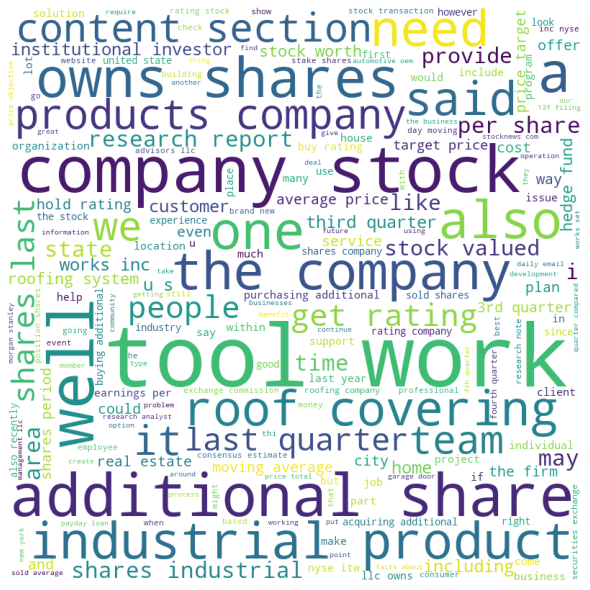

In [72]:
print("Wordcloud for Positive Business Topic\n")
generate_wordcloud(df_business, 'business', "Positive")

Wordcloud for Positive Attorney Topic



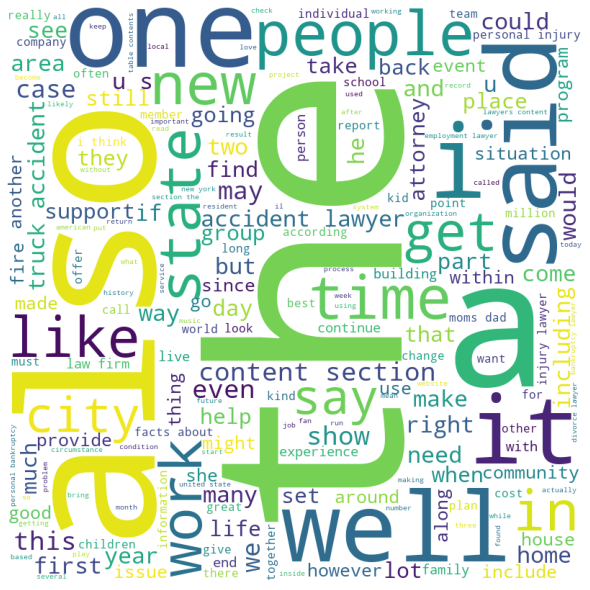

In [74]:
print("Wordcloud for Positive Attorney Topic\n")
generate_wordcloud(df_attorney, 'attorney', "Positive")

Wordcloud for Education Topic



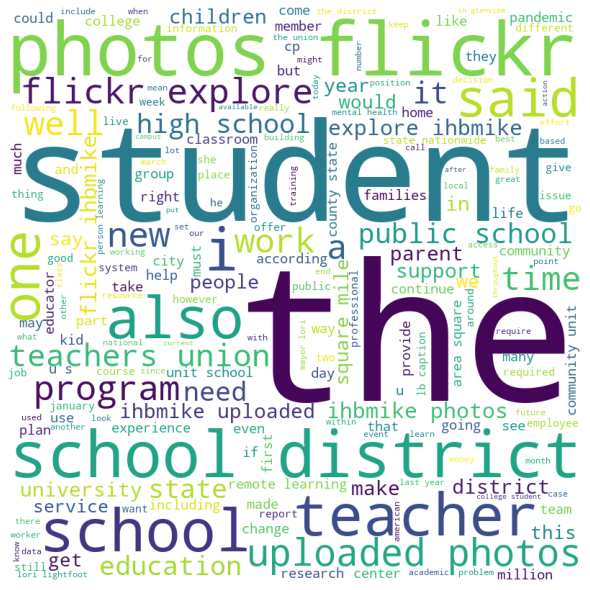

In [78]:
print("Wordcloud for Education Topic\n")
generate_wordcloud(df_education, 'education', "Positive")

In [79]:
person_positive.Relevant_Topic.value_counts()

business     9559
sports       6023
attorney     5449
education    2593
crime        2404
food         1324
drugs         946
divorce       574
Name: Relevant_Topic, dtype: int64

In [88]:
# Creating subset dataframes based on relevant topics in the positive sentiments df for person related articles

df_sports = person_positive[person_positive["Relevant_Topic"] == "sports"]
df_attorney = person_positive[person_positive["Relevant_Topic"] == "attorney"]
df_education = person_positive[person_positive["Relevant_Topic"] == "education"]
df_food = person_positive[person_positive["Relevant_Topic"] == "food"]
df_drugs = person_positive[person_positive["Relevant_Topic"] == "drugs"]
df_divorce = person_positive[person_positive["Relevant_Topic"] == "divorce"]

Wordcloud for Positive Sports Topic



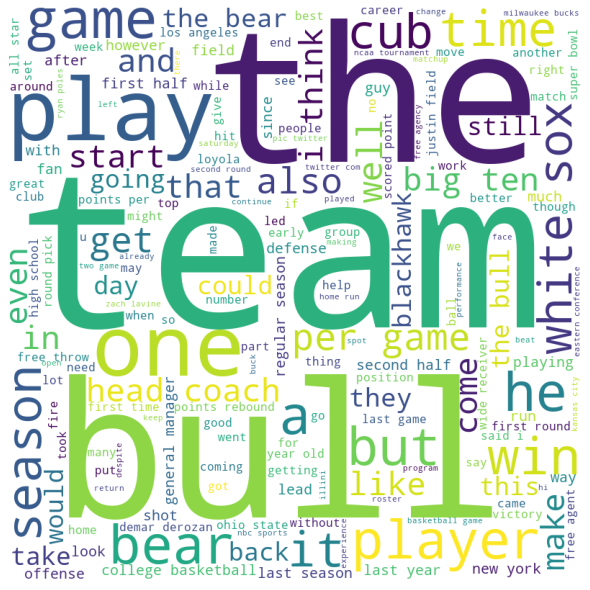

In [89]:
print("Wordcloud for Positive Sports Topic\n")
generate_wordcloud(df_sports, 'sports', "Positive")

Wordcloud for Positive Attorney Topic



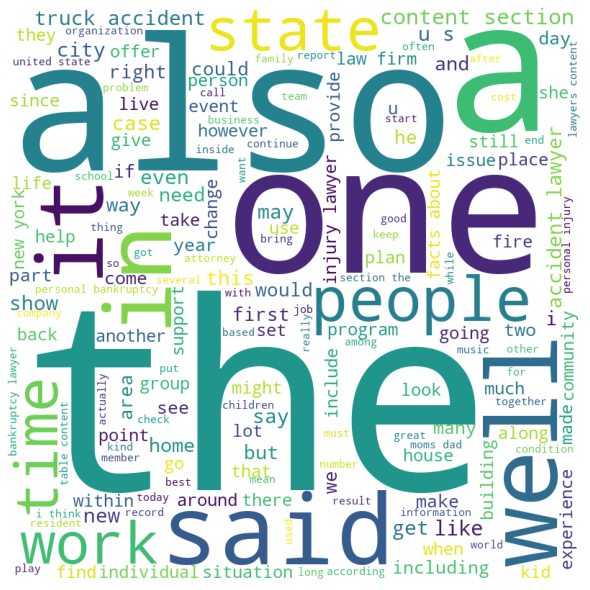

In [90]:
print("Wordcloud for Positive Attorney Topic\n")
generate_wordcloud(df_attorney, 'attorney', "Positive")

Wordcloud for Positive Education Topic



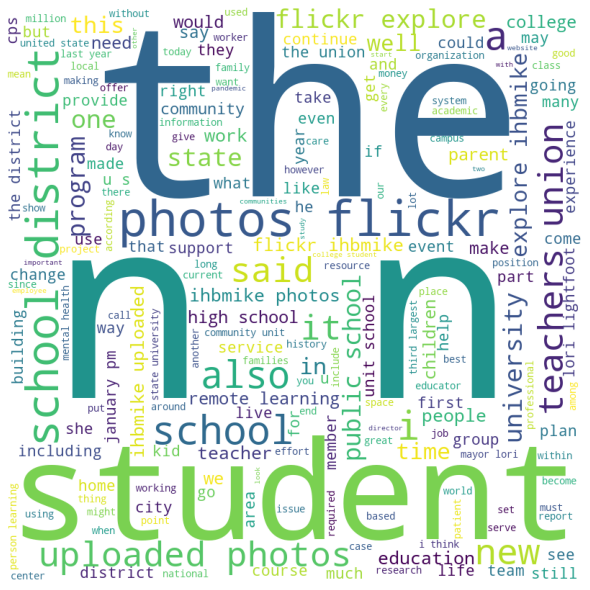

In [91]:
print("Wordcloud for Positive Education Topic\n")
generate_wordcloud(df_education, 'education', "Positive")

Wordcloud for Food Topic



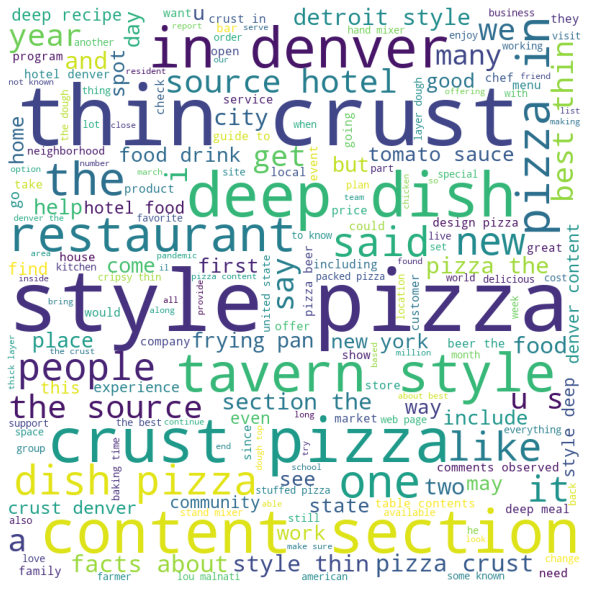

In [92]:
print("Wordcloud for Food Topic\n")
generate_wordcloud(df_food, 'food', "Positive")

Wordcloud for Drugs Topic



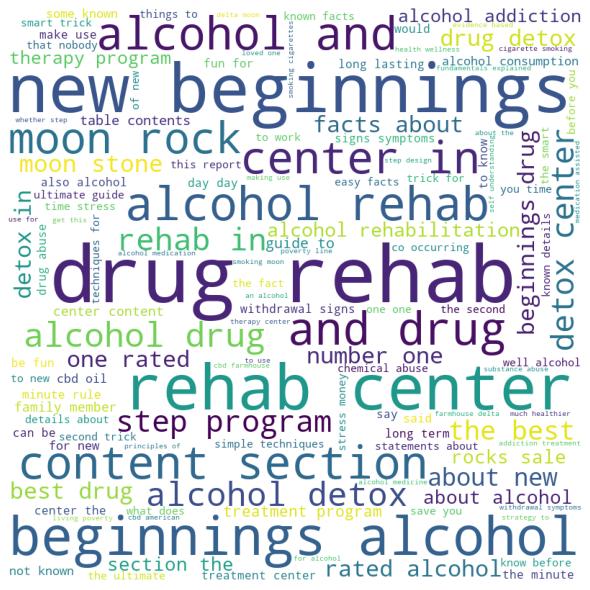

In [93]:
print("Wordcloud for Drugs Topic\n")
generate_wordcloud(df_drugs, 'drugs', "Positive")

Wordcloud for Divorce Topic



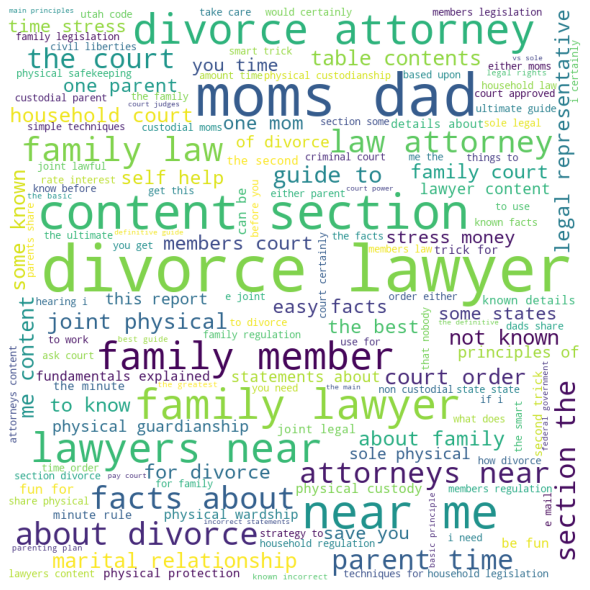

In [94]:
print("Wordcloud for Divorce Topic\n")
generate_wordcloud(df_divorce, 'divorce', "Positive")